#Data cleaning and preprocessing

In [445]:
#import pandas
import pandas as pd

In [446]:
Talco = pd.read_csv("/content/drive/MyDrive/Marketing project/Telco_customer_churn.csv")

In [447]:
#Display first 5 rows of data
Talco.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [448]:
#Display column names
Talco.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [449]:
#display unique values for each column
def sniff_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Percent Missing': df.isnull().sum() * 100 / len(df),
        'No. Unique': df.nunique(),
        'Unique Values': df.apply(lambda x: x.unique())
    }).sort_values('Data Type')

    with pd.option_context("display.max_colwidth", 20):
        return summary

sniff_summary(Talco)

,Data Type,Percent Missing,No. Unique,Unique Values
Count,int64,0.000000,1,[1]
Churn Score,int64,0.000000,85,"[86, 67, 84, 89, 78, 100, 92, 77, 97, 74, 66, ..."
Churn Value,int64,0.000000,2,"[1, 0]"
CLTV,int64,0.000000,3438,"[3239, 2701, 5372, 5003, 5340, 5925, 5433, 483..."
Zip Code,int64,0.000000,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 900..."
Tenure Months,int64,0.000000,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1..."
Monthly Charges,float64,0.000000,1585,"[53.85, 70.7, 99.65, 104.8, 103.7, 55.2, 39.65..."
Latitude,float64,0.000000,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3..."
Longitude,float64,0.000000,1651,"[-118.272783, -118.30742, -118.293953, -118.31..."
Streaming TV,object,0.000000,3,"[No, Yes, No internet service]"


In [450]:
#shape of data
Talco.shape

(7043, 33)

In [451]:
#display datatypes
Talco.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [494]:
#Convert 'Total Charges' column to numeric
Talco["Total Charges"] = pd.to_numeric(Talco["Total Charges"],errors='coerce')

In [453]:
#check missing values
missing_values = Talco.isnull().sum()
missing_values

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [454]:
Talco[Talco['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [455]:
Talco["Churn Reason"].nunique()

20

In [456]:
# Dropping specified columns from the dataframe
columns_to_drop = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label']
Talco_dropped = Talco.drop(columns=columns_to_drop)

Talco_dropped.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,90003,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved
3,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices


In [457]:
# Converting "Total Charges" to numeric with 'coerce' to handle non-numeric values
Talco_dropped['Total Charges'] = pd.to_numeric(Talco_dropped['Total Charges'], errors='coerce')

# Filling missing values in "Total Charges" with the mean of the column
Talco_dropped['Total Charges'].fillna(Talco_dropped['Total Charges'].mean(), inplace=True)

# Checking if there are still any missing values in "Total Charges"
missing_values_after_filling = Talco_dropped['Total Charges'].isnull().sum()
missing_values_after_filling

0

In [458]:
# Factorizing string columns
factorized_Talco = Talco_dropped.copy()
for column in factorized_Talco.select_dtypes(include=['object']).columns:
    factorized_Talco[column], _ = pd.factorize(factorized_Talco[column])

factorized_Talco.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,90003,0,0,0,0,2,0,0,0,0,...,0,0,0,0,53.85,108.15,1,86,3239,0
1,90005,1,0,0,1,2,0,0,1,1,...,0,0,0,1,70.70,151.65,1,67,2701,1
2,90006,1,0,0,1,8,0,1,1,1,...,1,0,0,1,99.65,820.50,1,86,5372,1
3,90010,1,0,1,1,28,0,1,1,1,...,1,0,0,1,104.80,3046.05,1,84,5003,1
4,90015,0,0,0,1,49,0,1,1,1,...,1,0,0,2,103.70,5036.30,1,89,5340,2


In [459]:
factorized_Talco.dtypes

Zip Code               int64
Gender                 int64
Senior Citizen         int64
Partner                int64
Dependents             int64
Tenure Months          int64
Phone Service          int64
Multiple Lines         int64
Internet Service       int64
Online Security        int64
Online Backup          int64
Device Protection      int64
Tech Support           int64
Streaming TV           int64
Streaming Movies       int64
Contract               int64
Paperless Billing      int64
Payment Method         int64
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason           int64
dtype: object

In [460]:
#factorized label mapping
string_columns = Talco_dropped.select_dtypes(include='object').columns

factorized_label_mapping = {col: {i: cat for i, cat in enumerate(Talco_dropped[col].astype('category').cat.categories)}
                            for col in string_columns}

factorized_label_mapping

{'Gender': {0: 'Female', 1: 'Male'},
 'Senior Citizen': {0: 'No', 1: 'Yes'},
 'Partner': {0: 'No', 1: 'Yes'},
 'Dependents': {0: 'No', 1: 'Yes'},
 'Phone Service': {0: 'No', 1: 'Yes'},
 'Multiple Lines': {0: 'No', 1: 'No phone service', 2: 'Yes'},
 'Internet Service': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
 'Online Security': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Online Backup': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Device Protection': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Tech Support': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Streaming TV': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Streaming Movies': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
 'Paperless Billing': {0: 'No', 1: 'Yes'},
 'Payment Method': {0: 'Bank transfer (automatic)',
  1: 'Credit card (automatic)',
  2: 'Electronic check',
  3: 'Mailed check'},
 'Churn Reason': {0: 'Attitude of service provider',
  

# EDA

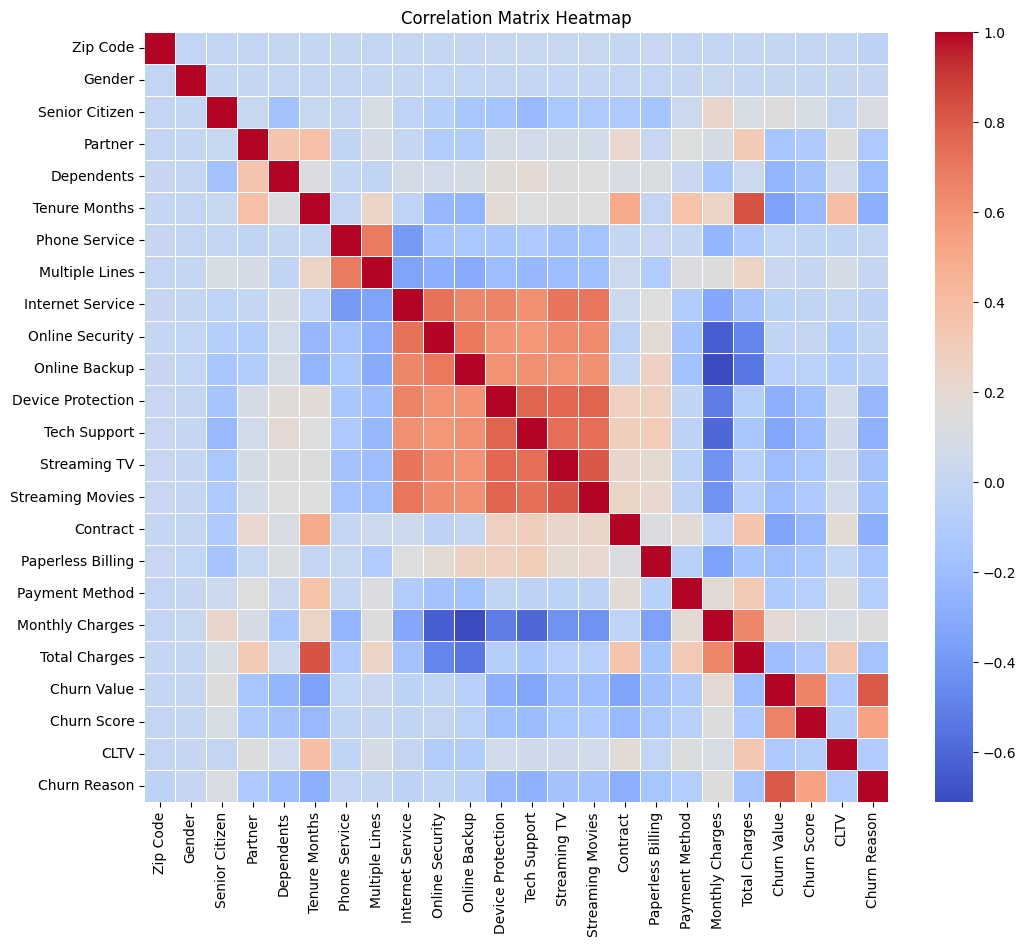

In [461]:
#correlation matrics for data connections
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = factorized_Talco.corr()
# Creating a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

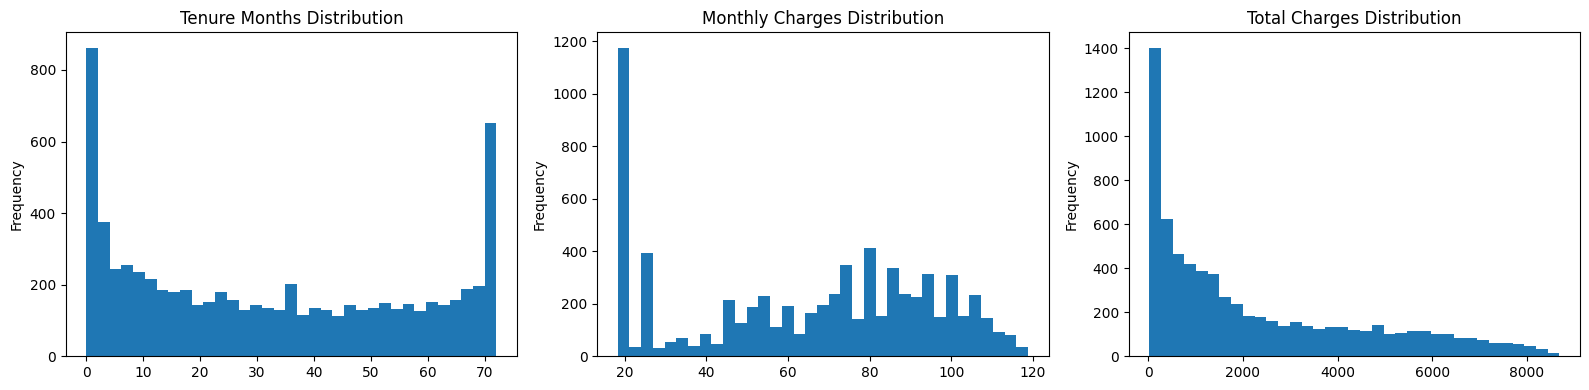

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,93521.964646,0.495244,0.162147,0.483033,0.231010,32.371149,0.096834,0.615505,0.872923,0.930001,...,0.821241,0.658952,0.407781,1.422547,64.761692,2283.300441,0.265370,58.699418,4400.295755,1.494960
std,1865.794555,0.500013,0.368612,0.499748,0.421508,24.559481,0.295752,0.656039,0.737796,0.706051,...,0.761725,0.801943,0.491457,1.064952,30.090047,2265.000258,0.441561,21.525131,1183.057152,5.158914
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000,-1.000000
25%,92102.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000,40.000000,3469.000000,-1.000000
50%,93552.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,70.350000,1400.550000,0.000000,61.000000,4527.000000,-1.000000
75%,95351.000000,1.000000,0.000000,1.000000,0.000000,55.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000,0.000000
max,96161.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000,19.000000


In [462]:
# Summary statistics for the dataset
summary_stats = factorized_Talco.describe()

# Histograms for 'Tenure Months', 'Monthly Charges', 'Total Charges'
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
factorized_Talco['Tenure Months'].plot(kind='hist', ax=ax[0], bins=35, title='Tenure Months Distribution')
factorized_Talco['Monthly Charges'].plot(kind='hist', ax=ax[1], bins=35, title='Monthly Charges Distribution')
factorized_Talco['Total Charges'].plot(kind='hist', ax=ax[2], bins=35, title='Total Charges Distribution')
plt.tight_layout()
plt.show()

summary_stats


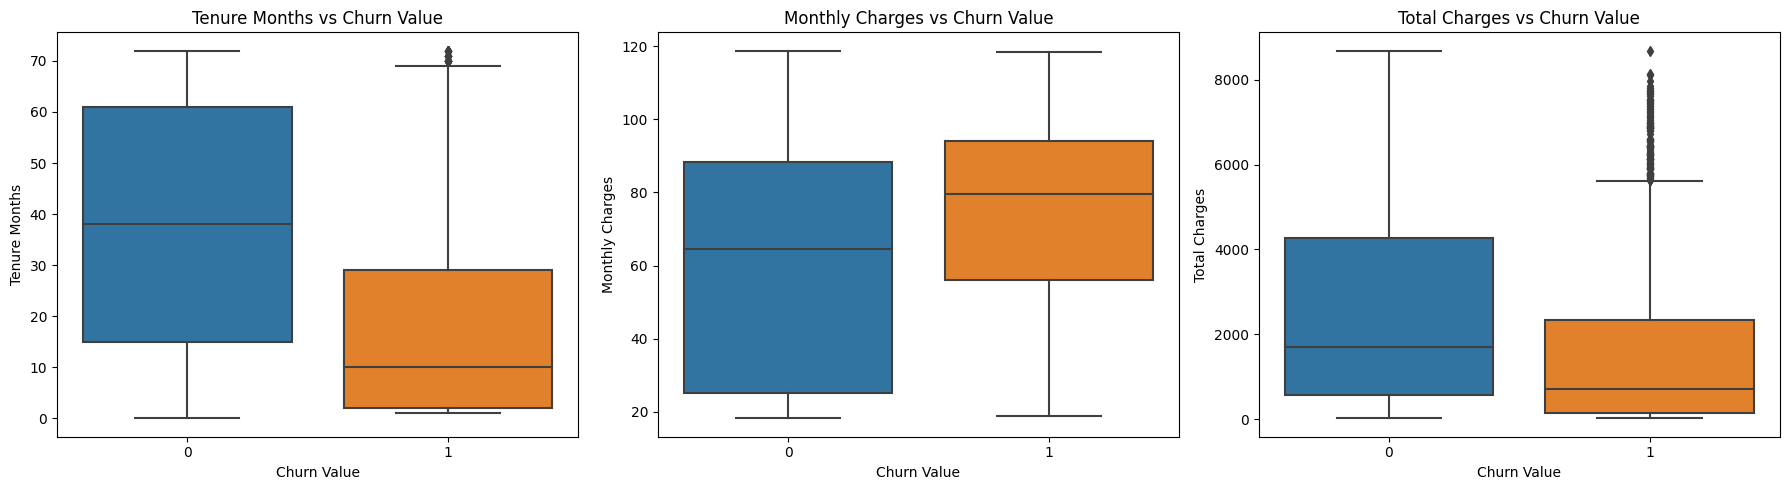

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the matplotlib figure
plt.figure(figsize=(18, 5))

# Boxplot for 'Tenure Months' vs 'Churn Value'
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn Value', y='Tenure Months', data=factorized_Talco)
plt.title('Tenure Months vs Churn Value')

# Boxplot for 'Monthly Charges' vs 'Churn Value'
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn Value', y='Monthly Charges', data=factorized_Talco)
plt.title('Monthly Charges vs Churn Value')

# Boxplot for 'Total Charges' vs 'Churn Value'
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn Value', y='Total Charges', data=factorized_Talco)
plt.title('Total Charges vs Churn Value')

plt.tight_layout()
plt.show()


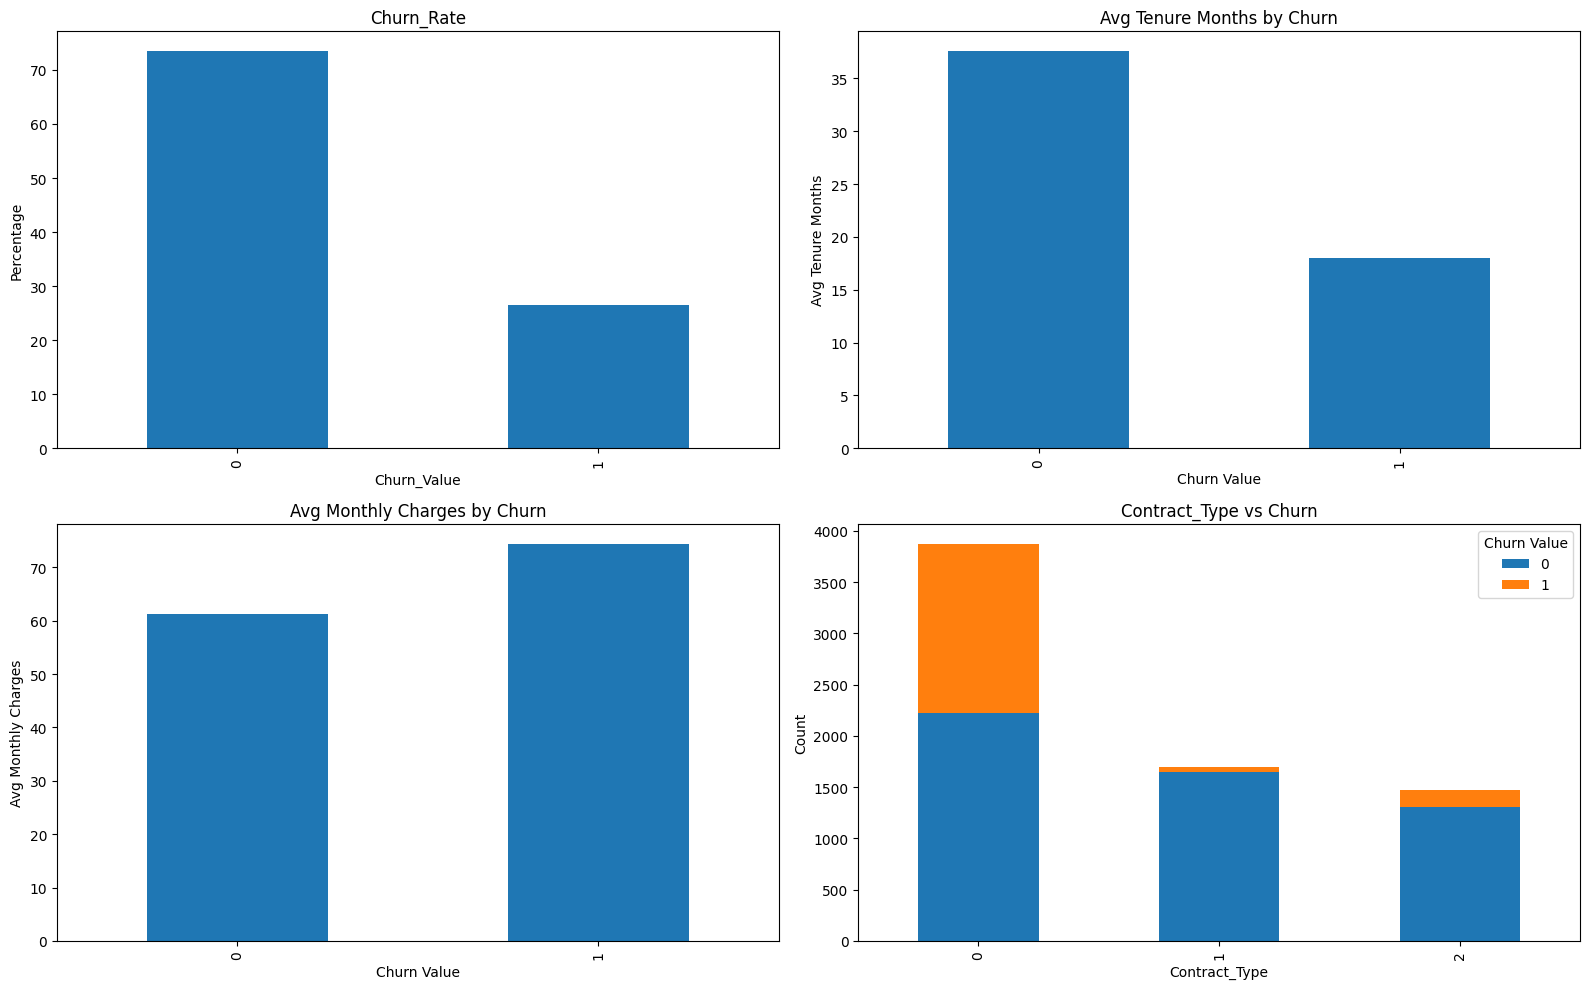

In [464]:
# In-depth Churn Analysis
churn_rate = factorized_Talco['Churn Value'].value_counts(normalize=True) * 100

# Tenure vs Churn
tenure_churn = factorized_Talco.groupby('Churn Value')['Tenure Months'].mean()

# Monthly Charges vs Churn
monthly_charges_churn = factorized_Talco.groupby('Churn Value')['Monthly Charges'].mean()

# Contract Type vs Churn
contract_churn = factorized_Talco.groupby(['Contract', 'Churn Value']).size().unstack()

# Services vs Churn - focusing on Internet Service as an example
internet_service_churn = factorized_Talco.groupby(['Internet Service', 'Churn Value']).size().unstack()

# Correlation Analysis
correlation_matrix = factorized_Talco.corr()

# Visualization
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

# Churn Rate
churn_rate.plot(kind='bar', ax=ax[0, 0])
ax[0, 0].set_title('Churn_Rate')
ax[0, 0].set_xlabel('Churn_Value')
ax[0, 0].set_ylabel('Percentage')

# Tenure vs Churn
tenure_churn.plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Avg Tenure Months by Churn')
ax[0, 1].set_xlabel('Churn Value')
ax[0, 1].set_ylabel('Avg Tenure Months')

# Monthly Charges vs Churn
monthly_charges_churn.plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Avg Monthly Charges by Churn')
ax[1, 0].set_xlabel('Churn Value')
ax[1, 0].set_ylabel('Avg Monthly Charges')

# Contract Type vs Churn
contract_churn.plot(kind='bar', stacked=True, ax=ax[1, 1])
ax[1, 1].set_title('Contract_Type vs Churn')
ax[1, 1].set_xlabel('Contract_Type')
ax[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Churn Analysis:

1. Churn rate is approximately 26.54%, with the majority of customers
not churning.
2. Tenure vs Churn:
Average Tenure for non-churning customers: 37.57 months.
Average Tenure for churning customers: 17.98 months.
Insight: Shorter tenure is associated with higher churn.
3. Monthly Charges vs Churn:
Average Monthly Charges for non-churning customers: $60.80.
Average Monthly Charges for churning customers: $73.98.
Insight: Higher monthly charges are associated with higher churn.
4. Contract Type vs Churn:
Higher churn rates are observed in month-to-month contracts compared to one or two-year contracts.
Insight: Short-term contracts have a higher likelihood of churn.
6. Correlation Analysis (Partial View):
Variables like 'Senior Citizen', 'Monthly Charges', and 'Paperless Billing' show some level of positive correlation with 'Churn Value'.
'Tenure Months', 'Partner', and 'Dependents' show negative correlation with 'Churn Value', indicating that these factors might be associated with lower churn rates.
Visualizations:
Histograms and bar charts visually illustrate these relationships and distributions.

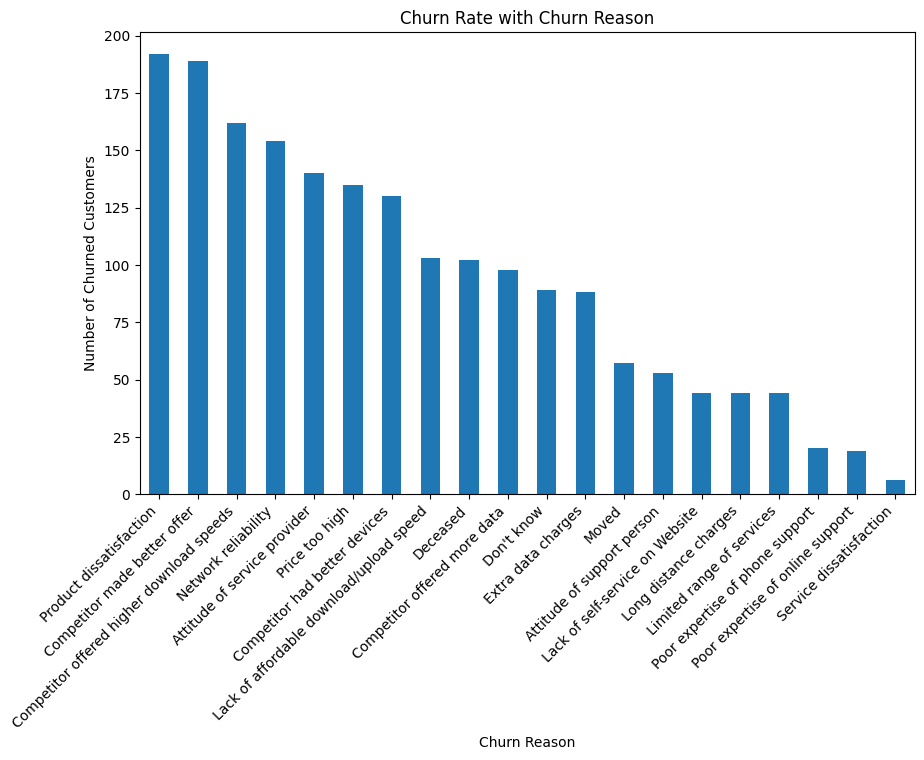

In [465]:
# Churn Rate by Churn Reason
# we can apply churn reason for those customers who already left, so filtering data
churn_customers = factorized_Talco[factorized_Talco['Churn Value'] == 1]

# summing up churn reason
churn_reason_count = churn_customers['Churn Reason'].value_counts()

# we factorized churn reason before, so we are applying back that labels
churn_reason_label = factorized_label_mapping['Churn Reason']
churn_reason_count.index = churn_reason_count.index.map(churn_reason_label)

# Plotting
plt.figure(figsize=(10, 6))
churn_reason_count.plot(kind='bar')
plt.title('Churn Rate with Churn Reason')
plt.xlabel('Churn Reason')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45, ha='right')
plt.show()


In [466]:
# Total number of churn customers
total_churned = churn_customers.shape[0]
total_customers = factorized_Talco.shape[0]

# Percentage of churned customers out of all customers
percentage_churned = (total_churned / total_customers) * 100

# Calculating the percentage of each churn_reason
churn_reason_percentage = (churn_reason_count / total_churned) * 100

print("Total percentage of customers who left the conpany: ",percentage_churned)

print("\nChurn reason percentage comparison: \n")
print(churn_reason_percentage)


Total percentage of customers who left the conpany:  26.536987079369588

Churn reason percentage comparison: 

Product dissatisfaction                      10.272873
Competitor made better offer                 10.112360
Competitor offered higher download speeds     8.667737
Network reliability                           8.239700
Attitude of service provider                  7.490637
Price too high                                7.223114
Competitor had better devices                 6.955591
Lack of affordable download/upload speed      5.510968
Deceased                                      5.457464
Competitor offered more data                  5.243446
Don't know                                    4.761905
Extra data charges                            4.708400
Moved                                         3.049759
Attitude of support person                    2.835741
Lack of self-service on Website               2.354200
Long distance charges                         2.354200
Limited r

In [467]:
# Filtering data for senior citizens
senior_citizens = factorized_Talco[factorized_Talco['Senior Citizen'] == 1]

# Counting the usage of each service by senior citizens
services = ['Phone Service', 'Internet Service', 'Tech Support', 'Streaming TV', 'Streaming Movies']
service_usage = {service: senior_citizens[service].value_counts(normalize=True) * 100 for service in services}

service_usage_Talco = pd.DataFrame(service_usage)

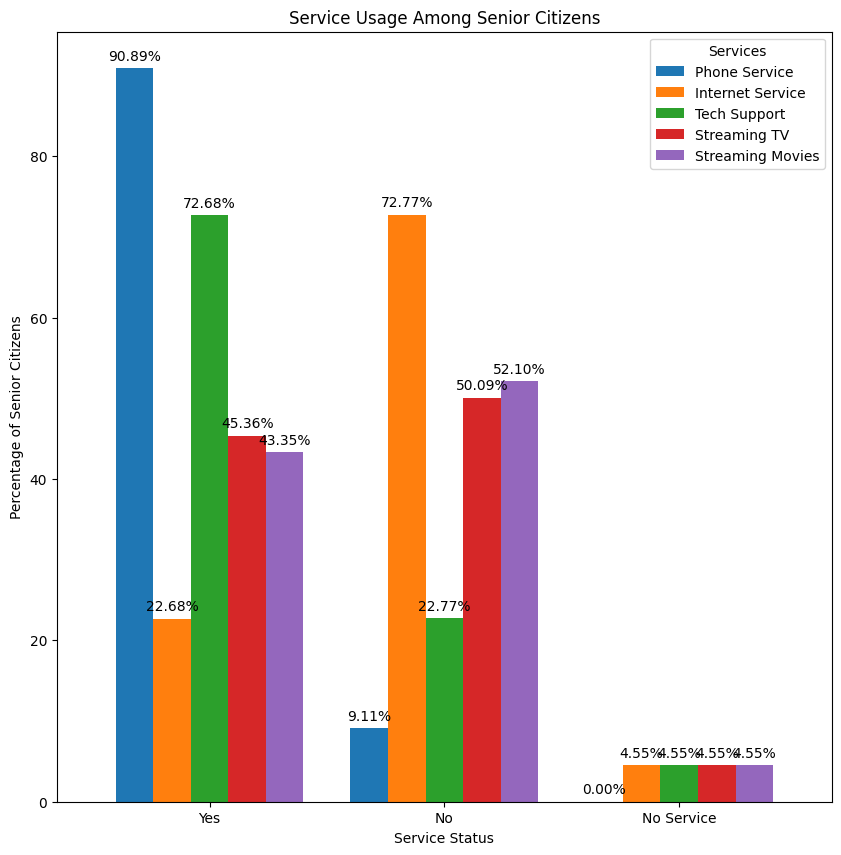

In [468]:
# Plotting with percentage above each bar
fig, ax = plt.subplots(figsize=(10,10))

# Plotting the bars
service_usage_Talco.plot(kind='bar', ax=ax,width=0.8)

# Adding percentage labels above each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 1), ha='center')

plt.title('Service Usage Among Senior Citizens')
plt.xlabel('Service Status')
plt.ylabel('Percentage of Senior Citizens')
plt.xticks(ticks=[0, 1, 2], labels=['Yes', 'No', 'No Service'], rotation=0)
plt.legend(title='Services')
plt.show()


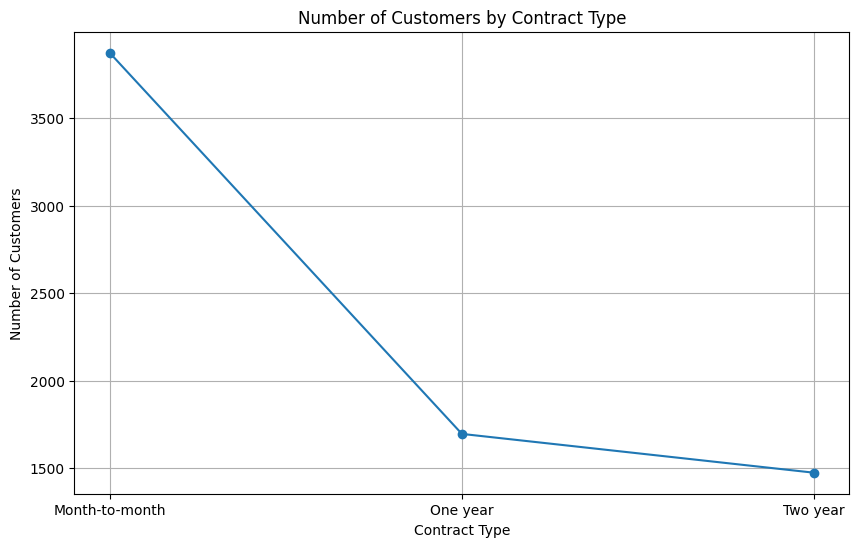

In [469]:
import matplotlib.pyplot as plt

# Mapping the numeric values back to string labels for 'Contract Type'
contract_type_labels = factorized_label_mapping['Contract']
factorized_Talco['Contract Type'] = factorized_Talco['Contract'].map(contract_type_labels)

# Counting the number of customers for each contract type
contract_type_counts = factorized_Talco['Contract Type'].value_counts()

# Plot the line graph
plt.figure(figsize=(10, 6))
contract_type_counts.plot(kind='line', marker='o')
plt.title('Number of Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.xticks(ticks=range(len(contract_type_labels)), labels=contract_type_labels.values())
plt.show()


#one hot encoding

In [470]:
# Dropping specified columns from the dataframe
columns_to_drop = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Lat Long', 'Latitude', 'Longitude','Churn Label','Churn Reason','Zip Code']
Talco_dropped_2 = Talco.drop(columns=columns_to_drop)

Talco_dropped_2.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340


In [471]:
# Converting "Total Charges" to numeric with 'coerce' to handle non-numeric values
Talco_dropped_2['Total Charges'] = pd.to_numeric(Talco_dropped_2['Total Charges'], errors='coerce')

# Filling missing values in "Total Charges" with the mean of the column
Talco_dropped_2['Total Charges'].fillna(Talco_dropped_2['Total Charges'].mean(), inplace=True)

# Checking if there are still any missing values in "Total Charges"
missing_values_after_filling_2 = Talco_dropped_2['Total Charges'].isnull().sum()
missing_values_after_filling_2

0

In [472]:
# Factorizing string columns
factorized_Talco_2 = Talco_dropped_2.copy()
col_2 = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Paperless Billing']
for column in factorized_Talco_2[col_2]:
    factorized_Talco_2[column], _ = pd.factorize(factorized_Talco_2[column])

factorized_Talco_2.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,0,0,0,0,2,0,No,DSL,Yes,Yes,...,No,No,Month-to-month,0,Mailed check,53.85,108.15,1,86,3239
1,1,0,0,1,2,0,No,Fiber optic,No,No,...,No,No,Month-to-month,0,Electronic check,70.70,151.65,1,67,2701
2,1,0,0,1,8,0,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,0,Electronic check,99.65,820.50,1,86,5372
3,1,0,1,1,28,0,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,0,Electronic check,104.80,3046.05,1,84,5003
4,0,0,0,1,49,0,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,0,Bank transfer (automatic),103.70,5036.30,1,89,5340


In [473]:
string_columns_2 = Talco_dropped[col_2]

factorized_label_mapping_2 = {col: {i: cat for i, cat in enumerate(Talco_dropped[col].astype('category').cat.categories)}
                            for col in string_columns_2}

factorized_label_mapping_2

{'Gender': {0: 'Female', 1: 'Male'},
 'Senior Citizen': {0: 'No', 1: 'Yes'},
 'Partner': {0: 'No', 1: 'Yes'},
 'Dependents': {0: 'No', 1: 'Yes'},
 'Phone Service': {0: 'No', 1: 'Yes'},
 'Paperless Billing': {0: 'No', 1: 'Yes'}}

In [474]:
import pandas as pd

# List of columns to apply one-hot encoding
colm_2 = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
        'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
        'Contract', 'Payment Method']

# Assuming factorized_Talco is your DataFrame
# Apply one-hot encoding to the specified categorical columns
factorized_Talco_2 = pd.get_dummies(factorized_Talco_2, columns=colm_2)

# Now, Talco_encoded has one-hot encoded columns for the specified categorical features
factorized_Talco_2.head()  # Display the first few rows to check the one-hot encoded columns


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,0,2,0,0,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
1,1,0,0,1,2,0,0,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
2,1,0,0,1,8,0,0,99.65,820.50,1,...,0,0,1,1,0,0,0,0,1,0
3,1,0,1,1,28,0,0,104.80,3046.05,1,...,0,0,1,1,0,0,0,0,1,0
4,0,0,0,1,49,0,0,103.70,5036.30,1,...,0,0,1,1,0,0,1,0,0,0


##normalization

In [475]:
# min-max normalization for (numeric variables)
min_max = ['Tenure Months', 'Monthly Charges', 'Total Charges']

# Scaling numerical variables
for column in min_max:
        # min value
        min_column = factorized_Talco_2[column].min()
        # max value
        max_column = factorized_Talco_2[column].max()
        # min max scaler
        factorized_Talco_2[column] = (factorized_Talco_2[column] - min_column) / (max_column - min_column)

In [476]:
factorized_Talco_2.head(5)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,0,0.027778,0,0,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
1,1,0,0,1,0.027778,0,0,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0.111111,0,0,0.809950,0.092511,1,...,0,0,1,1,0,0,0,0,1,0
3,1,0,1,1,0.388889,0,0,0.861194,0.349325,1,...,0,0,1,1,0,0,0,0,1,0
4,0,0,0,1,0.680556,0,0,0.850249,0.578987,1,...,0,0,1,1,0,0,1,0,0,0


#Model Creation

In [477]:
#creation of x and y variables for model deployment
X = factorized_Talco_2.drop('Churn Value', axis=1)
y = factorized_Talco_2['Churn Value']

In [478]:
#import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, shuffle=True)

In [479]:
#importing different models and model prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

def all_models(seed=2):
    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return models

# Create a StandardScaler and a pipeline for scaling and modeling
scaler = StandardScaler()
model_s = create_models()
pipelines = []

for name, model in model_s:
    pipelines.append((name, Pipeline([('Scaler', scaler), (name, model)])))

# Test the accuracy of each model using default hyperparameters
result = []
names = []
scoring = 'accuracy'

for name, model in pipelines:
    # Fit model to the training data
    model.fit(X_train, y_train)
    # predictions
    predictions = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Appending the model name and the accuracy
    result.append(accuracy)
    names.append(name)
    # Printing classifier_accuracy
    print('Classifier: {}, Accuracy: {:.4f}'.format(name, accuracy))


Classifier: k_nearest_neighbors, Accuracy: 0.8410
Classifier: logistic_regression, Accuracy: 0.9063
Classifier: random_forest, Accuracy: 0.9304
Classifier: gradient_boosting, Accuracy: 0.9255


#Feature Importance

In [480]:
# Reinitializing the RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extracting feature importances
feature_importances = rf.feature_importances_
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

importances.head(10)  # Displaying top 10 features

Churn Score                        0.434196
Tenure Months                      0.070483
Total Charges                      0.068853
Contract_Month-to-month            0.055576
Monthly Charges                    0.054059
CLTV                               0.048786
Online Security_No                 0.025646
Tech Support_No                    0.018908
Dependents                         0.016750
Payment Method_Electronic check    0.016634
dtype: float64

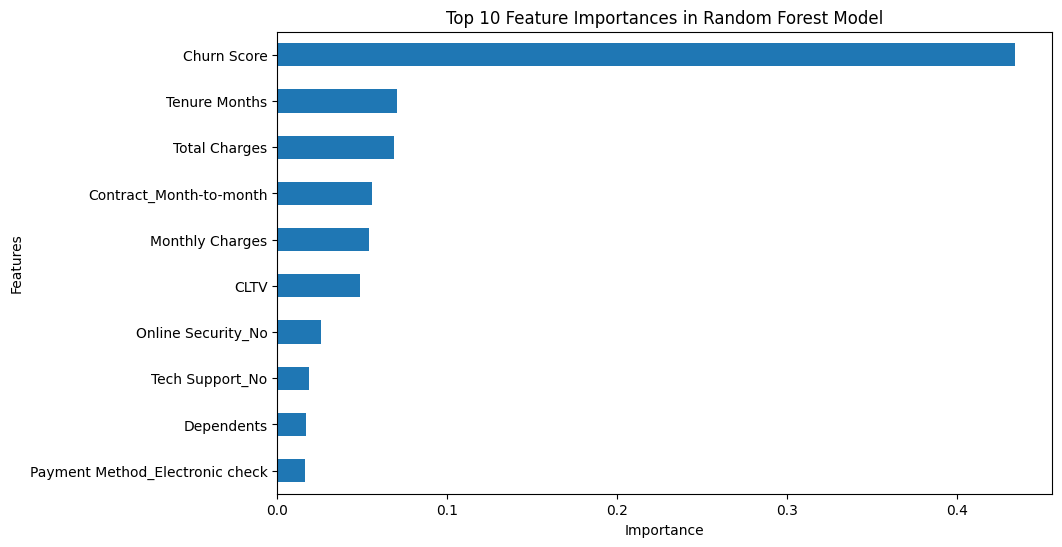

In [493]:
#ploting feature importance
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh')  # changed to 'barh' for horizontal bars
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Inverts the y-axis to display the most important feature at the top
plt.show()